# EDA

- Bank Customers have a very important role in keeping banks liquidity
- Customers are the main source of growth in bank assets
- The more assets under bank management, the higher revenue and profit

- It will be hard for a bank to grow and sustain if there are only few customers and few assets under management

**Banks should try their best to keep their customers**

# Goals :

- Keeping customers as much as possible, but still maintaining costs
- Lowering the percentage of customers that is closing their accounts
- Creating machine learning to classify customers with high probability on closing their accounts

# EDA Conclusion From Data Given :


- 20.37% of customers closed their accounts


- Senior (Age 40-65) are the most likely to close their account, followed by Elder (Age 65+) and Young Adult (Age 18-40)
    - 39.67% of Senior group closed their account
    - 13.26% of Elder group closed their account
    - 10.70% of Young Adult group closed their account


    - Mean Age of remaining customers : 37.4
    - Mean Age of former customers : 44.8
    
    - Median Age of remaining customers : 36
    - Median Age of former customers : 45
    
    
- Female are more likely to close their account
    - 25.07% of Female closed their account
    - 16.46% of Male closed their account
    
    
- Customers with more products are more likely to close their account, but it's still unclear why customers with 2 products are least likely to close their account
    - 100% of customers with 4 products closed their account
    - 82.70% of customers with 3 products closed their account
    - 27.70% of customers with 1 products closed their account
    - 7.58% of customers with 2 products closed their account
    
    
- Non-Active member are more likely to close their account
    - 26.85% of non-active members closed their account
    - 14.27% of active members closed their account
    
    
- Customers in Germany are most likely to close their account, followed by customers in Spain and France
    - 32.44% of customers in Germany closed their account
    - 16.67% of customers in Spain closed their account
    - 16.15% of customers in France closed their account
    
    
- Customers with more balance are more likely to close their account
    - Mean balance is 72.745 for remaining customers
    - Mean balance is 91.108 for former customers
    - 
    - Median balance is 92.072 for remaining customers
    - Median balance is 109.349 for former customers
    
    
- The Potential Balance from remaining customers is almost as high as the total balance of former customers

    
- There is no clear correlation between : 
    - credit score and balance 
    - credit score and age 
    - balance and age
       
    
# Recommendation


**Customers with high probability to close their accounts should be given a better services or some attractive offers**



**Others :**

- Sales Team and Customer Services should pay more attention to :
    - Senior group
    - Female
    - Customers with higher number of products
    - Non-Active members
    - Customers with more balance


- Management Team should pay more attention to :
    - Customers in Germany
    - Customers with more balance
    - Reconsidering a better services or higher interest rate for customer with higher balance
    

- Data Team should do more research about these important things :
    - Why customers in Germany are closing their accounts
    - Services needed for customers with higher balance
    - Best interest rate for customers and banks, especially for customers with higher balance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Drop Unecessary Column**

In [3]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


**Change Data Type**

In [9]:
dfcorr = pd.get_dummies(data=df, columns=['Geography'])

In [10]:
dfcorr['Gender'] = df['Gender'].map({
    'Male' : 0,
    'Female' : 1
})

In [11]:
dfcorr.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,-0.006772,0.024628,-0.016889
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


**Checking Data Distribution and Outliers**

Outliers Kept

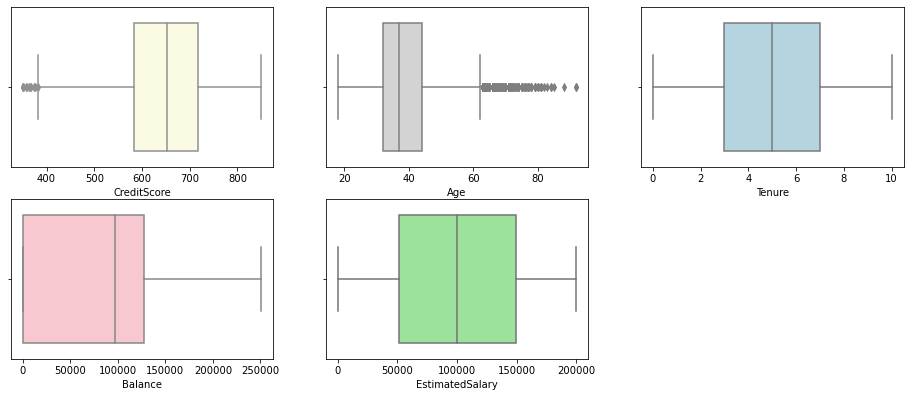

In [12]:
plt.figure(figsize=(16, 10))

plt.subplot(3,3,1)
sns.boxplot(df['CreditScore'], color='lightyellow')

plt.subplot(3,3,2)
sns.boxplot(df['Age'], color='lightgrey')

plt.subplot(3,3,3)
sns.boxplot(df['Tenure'], color='lightblue')

plt.subplot(3,3,4)
sns.boxplot(df['Balance'], color='pink')

plt.subplot(3,3,5)
sns.boxplot(df['EstimatedSalary'], color='lightgreen')

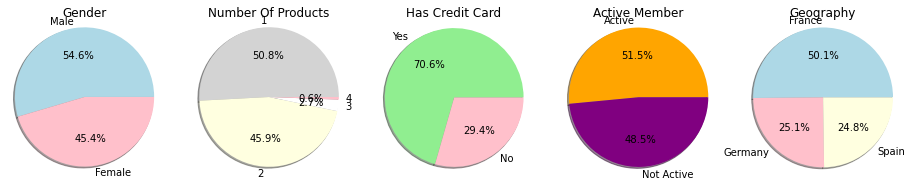

In [13]:
plt.figure(figsize=(16, 16))

plt.subplot(5,5,1)
labels = 'Male', 'Female'
colors = ['lightblue', 'pink']
plt.pie(df['Gender'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Gender')

plt.subplot(5,5,2)
labels = '1', '2', '3', '4'
colors = ['lightgrey', 'lightyellow', 'white', 'pink']
plt.pie(df['NumOfProducts'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Number Of Products')

plt.subplot(5,5,3)
labels = 'Yes', 'No'
colors = ['lightgreen', 'pink']
plt.pie(df['HasCrCard'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Has Credit Card')

plt.subplot(5,5,4)
labels = 'Active', 'Not Active'
colors = ['orange', 'purple']
plt.pie(df['IsActiveMember'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Active Member')

plt.subplot(5,5,5)
labels = 'France', 'Germany', 'Spain'
colors = ['lightblue', 'pink', 'lightyellow']
plt.pie(df['Geography'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Geography')

plt.show()

**Bining Data**

In [14]:
age_bin = [18, 40, 65, df['Age'].max()]
labels = ['Young Adult', 'Senior', 'Elder']

df['age_bin'] = pd.cut(df['Age'], bins=age_bin, labels = labels)

**Checking Data Target Percentage by Columns**

In [15]:
(df['Exited'].value_counts()/len(df)*100).round(2)

0    79.63
1    20.37
Name: Exited, dtype: float64

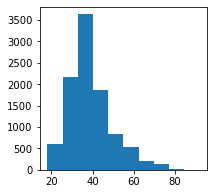

In [16]:
plt.figure(figsize=(3, 3))
plt.hist(df['Age'])
plt.show()

In [17]:
(df[['age_bin', 'Exited']].groupby(['age_bin']).mean()*100).sort_values('Exited', ascending=False)

,Exited
age_bin,
Senior,39.674405
Elder,13.257576
Young Adult,10.692512


In [18]:
(df[['Gender', 'Exited']].groupby(['Gender']).mean()*100).sort_values('Exited', ascending=False)

,Exited
Gender,
Female,25.071539
Male,16.455928


In [19]:
(df[['Tenure', 'Exited']].groupby(['Tenure']).mean()*100).sort_values('Exited', ascending=False)

,Exited
Tenure,
0,23.002421
1,22.415459
9,21.646341
3,21.110010
5,20.652174
10,20.612245
4,20.525784
6,20.268873
8,19.219512


In [20]:
(df[['NumOfProducts', 'Exited']].groupby(['NumOfProducts']).mean()*100).sort_values('Exited', ascending=False)

,Exited
NumOfProducts,
4,100.000000
3,82.706767
1,27.714398
2,7.581699


In [21]:
(df[['HasCrCard', 'Exited']].groupby(['HasCrCard']).mean()*100).sort_values('Exited', ascending=False)

,Exited
HasCrCard,
0,20.814941
1,20.184266


In [22]:
(df[['IsActiveMember', 'Exited']].groupby(['IsActiveMember']).mean()*100).sort_values('Exited', ascending=False)

,Exited
IsActiveMember,
0,26.850897
1,14.269074


In [23]:
(df[['Geography', 'Exited']].groupby(['Geography']).mean()*100).sort_values('Exited', ascending=False)

,Exited
Geography,
Germany,32.443204
Spain,16.673395
France,16.154767


Scatter Plot

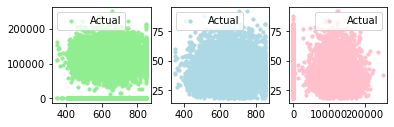

In [24]:
plt.figure(figsize=(6, 6))

plt.subplot(3,3,1)
plt.scatter(df['CreditScore'], df['Balance'], s=10, color='lightgreen', label='Actual')
plt.legend(loc = 0)

plt.subplot(3,3,2)
plt.scatter(df['CreditScore'], df['Age'], s=10, color='lightblue', label='Actual')
plt.legend(loc = 0)

plt.subplot(3,3,3)
plt.scatter(df['Balance'], df['Age'], s=10, color='pink', label='Actual')
plt.legend(loc = 0)

Balance Box Plot

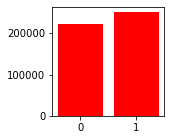

Total Balance of Remaining And Former Customers


In [25]:
plt.figure(figsize=(2, 2))
plt.bar(df['Exited'], df['Balance'], color='red')

plt.show()

print("Total Balance of Remaining And Former Customers")

In [26]:
print('Balance :')
print('Mean Remain : ', df['Balance'][df['Exited']==0].mean())
print('Mean Closed : ',df['Balance'][df['Exited']==1].mean())
print('Median Remain : ', df['Balance'][df['Exited']==0].median())
print('Median Closed : ',df['Balance'][df['Exited']==1].median())

Balance :
Mean Remain :  72745.29677885193
Mean Closed :  91108.53933726063
Median Remain :  92072.68
Median Closed :  109349.29


In [27]:
print('Age :')
print('Mean Remain : ', df['Age'][df['Exited']==0].mean())
print('Mean Closed : ',df['Age'][df['Exited']==1].mean())
print('Median Remain : ', df['Age'][df['Exited']==0].median())
print('Median Closed : ',df['Age'][df['Exited']==1].median())

Age :
Mean Remain :  37.40838879819164
Mean Closed :  44.8379970544919
Median Remain :  36.0
Median Closed :  45.0


In [28]:
print('Credit Score :')
print('Mean Remain : ', df['CreditScore'][df['Exited']==0].mean())
print('Mean Closed : ',df['CreditScore'][df['Exited']==1].mean())
print('Median Remain : ', df['CreditScore'][df['Exited']==0].median())
print('Median Closed : ',df['CreditScore'][df['Exited']==1].median())

Credit Score :
Mean Remain :  651.8531960316463
Mean Closed :  645.3514972999509
Median Remain :  653.0
Median Closed :  646.0


In [29]:
print('Number of Products :')
print('Mean Remain : ', df['NumOfProducts'][df['Exited']==0].mean())
print('Mean Closed : ',df['NumOfProducts'][df['Exited']==1].mean())

Number of Products :
Mean Remain :  1.5442672359663443
Mean Closed :  1.4752086401570939
